
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W9/W9.ipynb)





In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def download_data():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/ADS523_TS/main/W9/combined_csv.csv"
  res = requests.get(url, allow_redirects=True)
  with open('combined_csv.csv','wb') as file:
    file.write(res.content)

download_data()  

### See [the link text](https://www.kaggle.com/datasets/ibrahimkiziloklu/solar-radiation-dataset) for the description of the dataset.

In [3]:
data_ = pd.read_csv("combined_csv.csv")
 #### we will use the windspeed

In [4]:
data_

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed,Unnamed: 18
0,2017,1,1,0,0,-0.6,0,0,0,-2.6,0,0,0,86.29,152.92,0.12,1003,1.7,NaN
1,2017,1,1,0,15,-0.6,0,0,0,-2.6,0,0,0,86.29,150.22,0.12,1003,1.7,NaN
2,2017,1,1,0,30,-0.6,0,0,0,-2.6,0,0,0,86.29,147.43,0.12,1003,1.7,NaN
3,2017,1,1,0,45,-0.6,0,0,0,-2.7,0,0,0,85.54,144.60,0.12,1003,1.6,NaN
4,2017,1,1,1,0,-0.7,0,0,0,-2.7,0,0,0,86.17,141.71,0.12,1003,1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2019,12,31,22,45,4.0,0,0,0,4.0,0,0,0,100.00,163.63,0.12,999,2.0,NaN
105116,2019,12,31,23,0,3.9,0,0,0,3.9,0,0,0,100.00,162.09,0.12,999,2.0,NaN
105117,2019,12,31,23,15,3.9,0,0,0,3.9,0,0,0,100.00,160.16,0.12,999,2.0,NaN
105118,2019,12,31,23,30,3.9,0,0,0,3.9,0,0,0,100.00,157.93,0.12,999,2.0,NaN


In [5]:
data = data_["Wind Speed"]

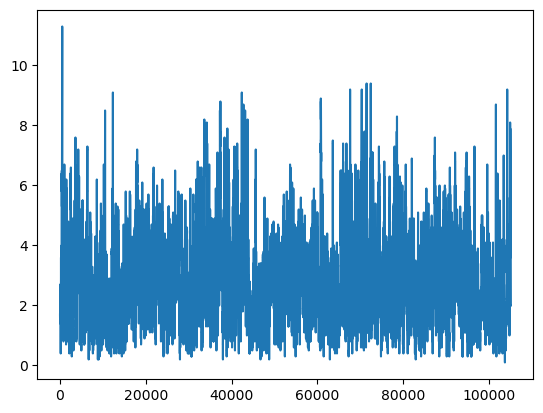

In [6]:
plt.plot(data)   #### you see there is not explicit trend, nor unit root.

In [7]:
import statsmodels

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

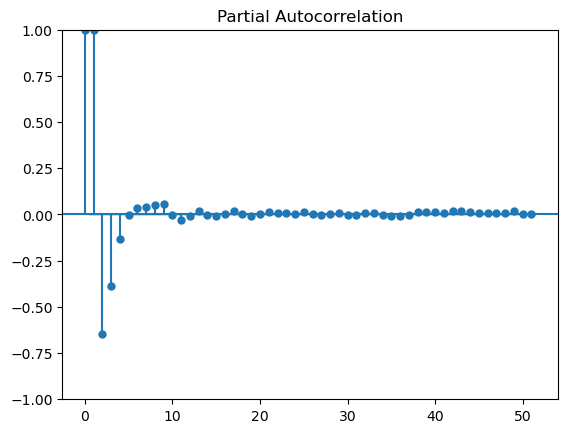

In [9]:
plot_pacf(data); #AR(10) appears to be ok...

In [10]:
from statsmodels.tsa.stattools import arma_order_select_ic
arma_order_select_ic(data[:100], max_ar = 12)

/home/sahmaran/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/sahmaran/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/sahmaran/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/sahmaran/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/sahmaran/anaconda3/lib/python3.11/site-pa

{'bic':              0           1           2
 0    64.400664  -58.229711 -121.518142
 1  -260.016585 -270.242776 -268.964383
 2  -277.010404 -287.089617 -283.266819
 3  -279.439835 -283.100551 -281.243150
 4  -286.184564 -280.988295 -282.126409
 5  -281.823144 -278.900437 -276.774190
 6  -281.836519 -278.008840 -275.748345
 7  -279.360530 -276.041905 -271.178613
 8  -279.115616 -273.586677 -268.655084
 9  -275.890109 -271.990362 -270.358561
 10 -271.316861 -267.651517 -266.584855
 11 -268.407340 -265.999556 -261.743599
 12 -269.493761 -263.547282 -258.972947,
 'bic_min_order': (2, 1)}

In [11]:
from statsmodels.tsa.arima.model import  ARIMA
mod = ARIMA(data[:1000], order = (20,0,1))
model = mod.fit()

/home/sahmaran/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Wind Speed   No. Observations:                 1000
Model:                ARIMA(20, 0, 1)   Log Likelihood                1257.999
Date:                Fri, 19 Apr 2024   AIC                          -2469.999
Time:                        10:08:35   BIC                          -2357.120
Sample:                             0   HQIC                         -2427.097
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6276      0.852      4.258      0.000       1.958       5.297
ar.L1          1.0302      0.935      1.102      0.270      -0.802       2.862
ar.L2          0.3740      1.185      0.316      0.752      -1.948       2.696
ar.L3         -0.1702      0.082     -2.063      0.039      -0.332      -0.009
ar.L4         -0.0041      0.181     -0.023      0.982      -0.359       0.351
ar.L5         -0.1480      0.061     -2.419      0.016      -0.268      -0.028
ar.L6         -0.1211      0.156     -0.774      0.439      -0.428       0.185
ar.L7          0.0009      0.097      0.009      0.993      -0.189       0.191
ar.L8         -0.1031      0.055     -1.889      0.059      -0.210       0.004
ar.L9          0.0539      0.116      0.465      0.642      -0.173       0.281
ar.L10         0.1186      0.091      1.307      0.191      -0.059       0.296
ar.L11         0.0187      0.107      0.175      0.861      -0.191       0.229
ar.L12        -0.0260      0.056     -0.461      0.645      -0.137       0.085
ar.L13        -0.0514      0.053     -0.970      0.332      -0.155       0.052
ar.L14         0.0519      0.068      0.766      0.444      -0.081       0.185
ar.L15        -0.0183      0.086     -0.213      0.831      -0.187       0.150
ar.L16        -0.0515      0.062     -0.836      0.403      -0.172       0.069
ar.L17         0.0087      0.065      0.134      0.893      -0.118       0.136
ar.L18         0.0159      0.060      0.264      0.792      -0.102       0.134
ar.L19         0.0497      0.048      1.029      0.303      -0.045       0.144
ar.L20        -0.0319      0.037     -0.862      0.389      -0.105       0.041
ma.L1          0.2369      0.938      0.253      0.801      -1.601       2.075
sigma2         0.0047      0.000     37.900      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6319.95
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

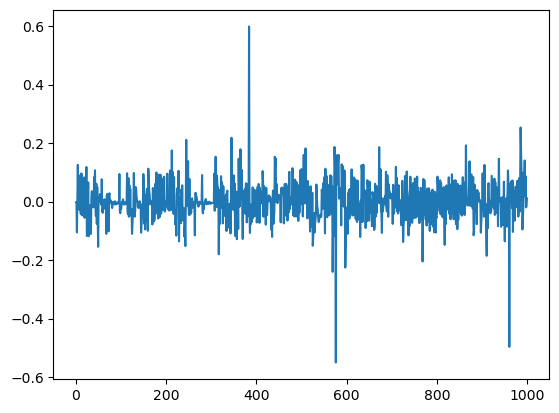

In [13]:
plt.plot(model.resid[1:])

In [14]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(model.resid[1:], model_df = 21, return_df = True, lags = 50)

,lb_stat,lb_pvalue
1,0.002641,NaN
2,0.002765,NaN
3,0.003933,NaN
4,0.004165,NaN
5,0.014184,NaN
6,0.019603,NaN
7,0.034563,NaN
8,0.034851,NaN
9,0.036125,NaN
10,0.037960,NaN


In [15]:
def splitter(data, alpha = 0.8):  ### We split the data into 0.8 and 0.2  train test splitting we do not do validation.
  N = len(data)
  N_ = int(alpha*N)
  data_train = data[:N_]
  data_test = data[N_:]
  return data_train, data_test

In [16]:
data_train, data_test = splitter(data)

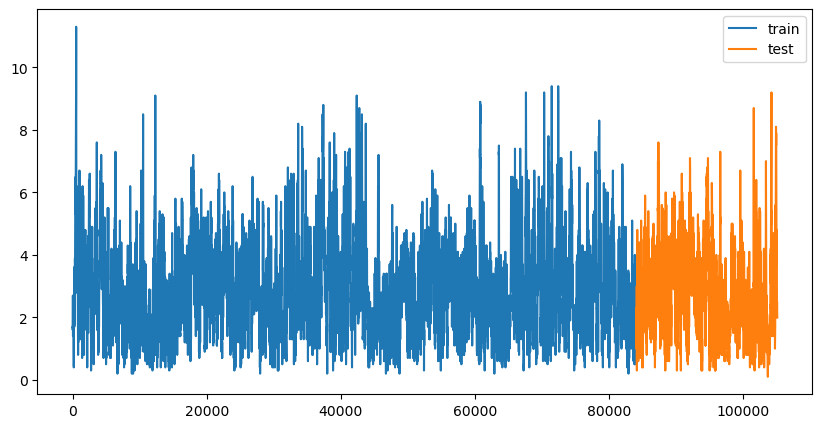

In [17]:
plt.figure(figsize= (10,5))
plt.plot(data_train, label ="train")
plt.plot(data_test, label = "test")
plt.legend()
plt.show()

In [18]:
def sliding_window(data:list, window_size:int = 100):
  data = np.array(data)
  X = []
  y = []
  i = 0
  while True:
    try:
      y.append(data[i+window_size])
      X.append(data[i:i+window_size])
      i += 1
    except Exception:
      print(f"We have reached the end of the list! There are total number of {i} rows in your data")
      break
  return np.array(X), np.array(y)

In [19]:
(X_train, y_train), (X_test, y_test) = sliding_window(data_train), sliding_window(data_test)

We have reached the end of the list! There are total number of 83996 rows in your data
We have reached the end of the list! There are total number of 20924 rows in your data


###Start with KNN

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)   #### this gives R2 score, no need to import sklearn's r2score.
y_pred = knn.predict(X_test)

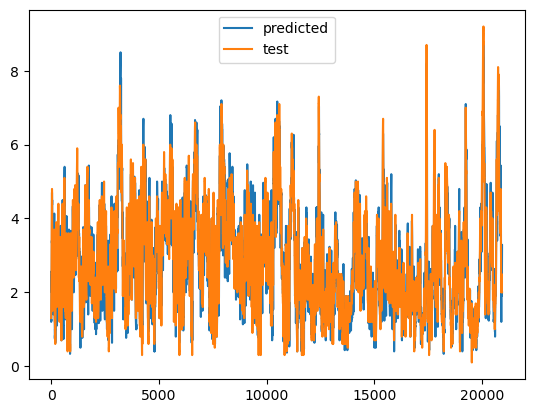

In [21]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "test")
plt.legend()
plt.show()

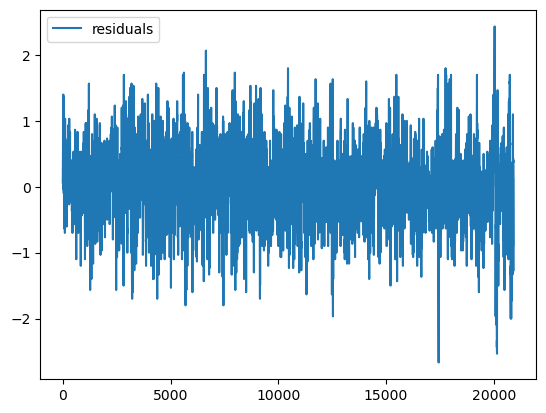

In [22]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [23]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(0.022865290256802395, 0.49328626418644544)

###Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(score)   #### this give R2 score, no need to import slearn r2score.
y_pred = dt.predict(X_test)

0.9953298636109154


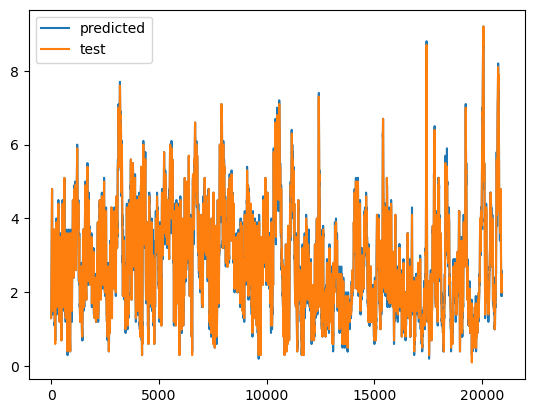

In [26]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "test")
plt.legend()
plt.show()

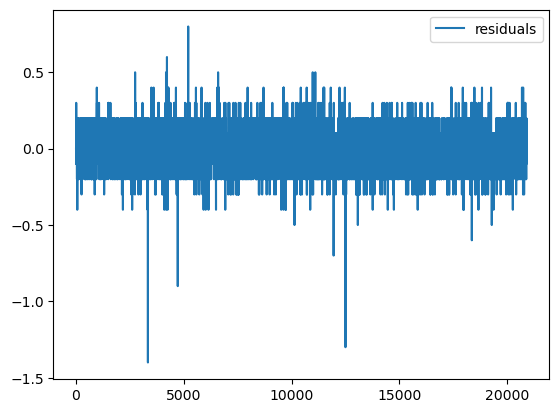

In [27]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [28]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(-0.0011517874211432718, 0.09814078229419491)

## Time for neural networks

In [29]:
from sklearn.neural_network import MLPRegressor
ml = MLPRegressor(hidden_layer_sizes = (50,25))
ml.fit(X_train, y_train)
score = ml.score(X_test, y_test)
print(score)   #### this gives R2 score, no need to import sklearn r2score.
y_pred = ml.predict(X_test)

0.996492940201702


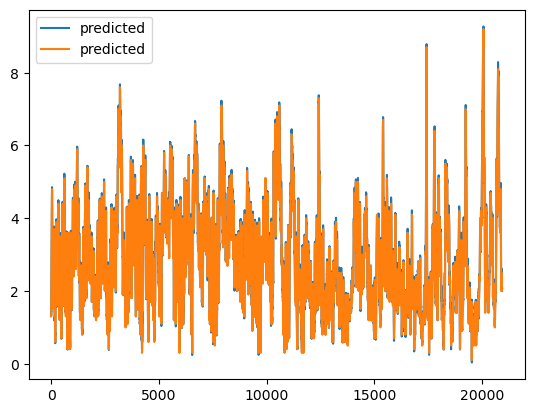

In [30]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "predicted")
plt.legend()
plt.show()

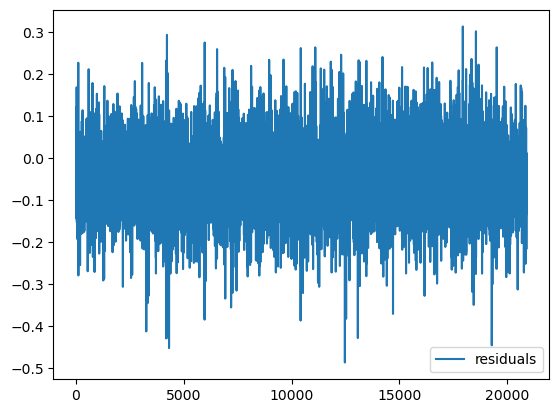

In [31]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [32]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(-0.04860773856494789, 0.06979308026339794)

In [33]:
ml.coefs_

[array([[-5.90423750e-275, -1.83780927e-001,  2.09146671e-001, ...,
          9.97066012e-002, -5.60972160e-002, -3.40770408e-002],
        [-3.24832157e-269, -7.41621604e-002,  1.33511305e-001, ...,
         -1.64787848e-001, -1.71556434e-001, -8.57418732e-003],
        [-1.61010191e-283,  6.56021381e-002, -1.87693424e-001, ...,
          2.08526491e-001, -1.02174493e-001,  5.97165644e-002],
        ...,
        [ 1.21869089e-291, -2.14643853e-001,  1.34659884e-001, ...,
         -1.01706157e-001,  3.81268897e-002,  1.92711900e-001],
        [-2.26738095e-265,  5.60060215e-002,  1.02209056e-001, ...,
          6.30669400e-002,  1.14465358e-001,  1.21478819e-002],
        [ 3.57100819e-280, -3.51031116e-002,  3.89804061e-001, ...,
         -3.02315379e-001, -1.34283553e-001, -9.20243636e-002]]),
 array([[ 8.12602425e-270,  6.53350799e-284,  7.32998207e-279, ...,
         -3.51094450e-274,  2.88754391e-275,  1.73340961e-279],
        [ 5.53654716e-002,  1.12078477e-003,  5.33663987e-002

###See what np.roll does to an array np.roll(A, shift)

In [34]:
np.roll([1,2,3,4,5],-1)

array([2, 3, 4, 5, 1])

#Let's do a long term forecast and see what happens?

In [47]:
def function(regressor, data:np.array, length = 10):
  temp = np.copy(data)
  for i in range(length):
    L = regressor.predict(temp.reshape(1,-1))
    temp = np.roll(temp, -1)
    temp[-1]=  L[0]
  return temp

In [48]:
function(ml, X_train[-1], 250)  #### length 25 forecast we did.

array([22.96526643, 23.25943514, 23.55748117, 23.8530082 , 24.15465538,
       24.45274756, 24.7543366 , 25.04824264, 25.34816807, 25.64761024,
       25.94868826, 26.24487177, 26.55113265, 26.8597018 , 27.16949874,
       27.47940688, 27.80671812, 28.14011341, 28.47399307, 28.80957172,
       29.16240226, 29.51921535, 29.87681319, 30.23617236, 30.61249221,
       30.98953757, 31.36996535, 31.75698409, 32.16054668, 32.56664785,
       32.97809092, 33.40065733, 33.8370891 , 34.27141133, 34.7145476 ,
       35.16707167, 35.63474467, 36.09958127, 36.57561862, 37.0626456 ,
       37.56049883, 38.06221199, 38.57782973, 39.10915426, 39.6543925 ,
       40.20308773, 40.76723488, 41.33793723, 41.92369033, 42.51391665,
       43.11708115, 43.72519311, 44.3416907 , 44.96788901, 45.60186594,
       46.24335216, 46.89539706, 47.55422134, 48.21926184, 48.88405392,
       49.56523361, 50.25068517, 50.94247847, 51.63492945, 52.34016761,
       53.05054466, 53.76087321, 54.47563946, 55.20028914, 55.92

In [49]:
index = data_test.index  ### we get the index set.  of the train set

In [50]:
X_forecast = function(ml, X_train[-1], 20)  #### length 25 forecast we did.

In [51]:
data_forecast = pd.Series(X_forecast)
data_forecast.index = range(index[0]+1, index[0]+len(data_forecast)+1)

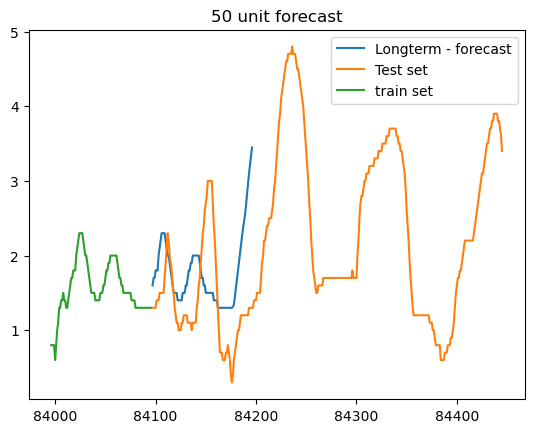

In [52]:
plt.plot(data_forecast, label= "Longterm - forecast")
plt.plot(data_test[:350], label = "Test set")
plt.plot(data_train[-100:], label = "train set")
plt.title("50 unit forecast")
plt.legend()
plt.show()

##You see, long term forecast is not as easy as short term forecast.